In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [234]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [236]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [238]:
df.shape

(13320, 9)

In [244]:
df.drop(columns=['society'], inplace=True)
df.dropna(subset=['size'], inplace=True)

In [246]:
df.shape

(13304, 8)

In [248]:
df['location'].fillna(df['location'].mode()[0], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3384\804140725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna(df['location'].mode()[0], inplace=True)


In [250]:
# Fill missing values in numerical columns with median
df['bath'].fillna(df['bath'].median(), inplace=True)
df['balcony'].fillna(0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3384\2060013941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3384\2060013941.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [252]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [254]:
df['size'].unique() # featur enginearing

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [256]:
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))

In [258]:
# # Example: Load additional dataset
# demographics_df = pd.read_csv('Neighborhood_Demographics.csv')

# # Merge datasets on the common column (e.g., `location`)
# df = pd.merge(df, demographics_df, on='location', how='left')


In [262]:
# Example: Filter for properties available immediately and in a specific city
dff = df[df['availability'] == 'Ready To Move' ]
dff

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.0,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.0,2
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.0,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.0,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,0.0,400.0,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.0,2


In [122]:
from sklearn.preprocessing import LabelEncoder
df['location'] = LabelEncoder().fit_transform(df['location'])

In [124]:
avg_price_neighborhood = df.groupby('location')['price'].mean()
print(avg_price_neighborhood)

location
0        16.000000
1        35.000000
2        50.000000
3        22.890000
4       124.833333
           ...    
1300    160.000000
1301     60.750000
1302    200.000000
1303    275.000000
1304     32.730000
Name: price, Length: 1305, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x20f86eb7140>,
 'caps': [<matplotlib.lines.Line2D at 0x20f86eb5850>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ffc8003b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20f86eb7aa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f86eb7d10>],
 'means': []}

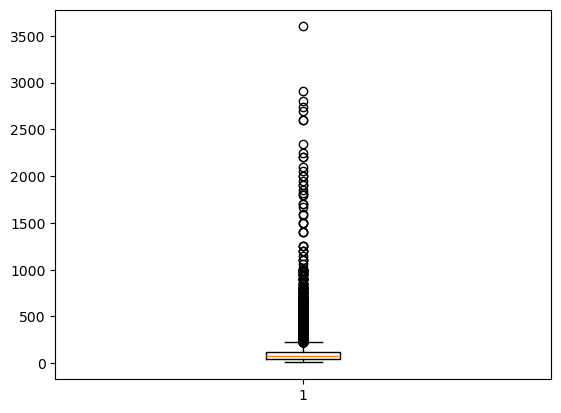

In [264]:
plt.boxplot(df['price'])

In [280]:
# Using IQR to detect outliers in 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


{'whiskers': [<matplotlib.lines.Line2D at 0x20f8766ad50>,
 'caps': [<matplotlib.lines.Line2D at 0x20f8766b2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f87668ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x20f8766b740>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f8766b9e0>],
 'means': []}

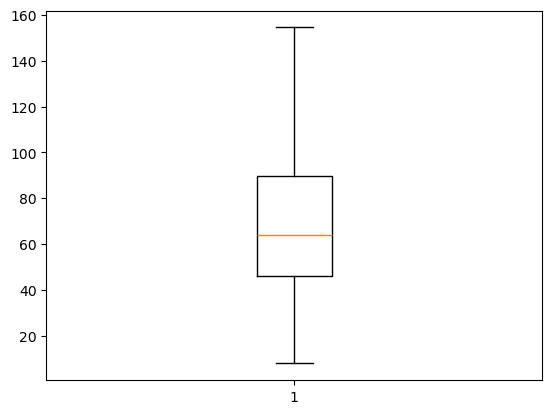

In [282]:
plt.boxplot(df['price'])